# k-**means**

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist # metric mình dùng trong bài này.
np.random.seed(11)

In [14]:
# Tạo sample data.
means = [[5, 5], [7, 1], [1, 7]]
cov = [[1, 0], [0, 1]]
N = 500
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)

X = np.concatenate((X0, X1, X2), axis = 0) # data sample
K = 3

original_label = np.asarray([0]*N + [1]*N + [2]*N).T # label

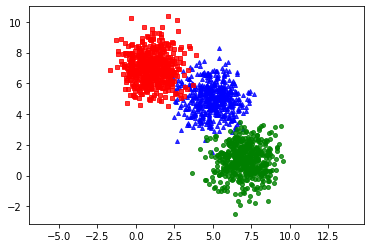

In [20]:
def kmeans_display(X, label):
    K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]
    
    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 4, alpha = .8)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 4, alpha = .8)

    plt.axis('equal')
    plt.plot()
    plt.show()
    
kmeans_display(X, original_label)

### Thuật toán

B1 : Khởi tạo k điểm center (k tự chọn). 
    
    Lấy random k điểm trong dataset.

    hoặc Chọn random bất kì

B2 : Gán label các điểm còn lại theo các điểm center đã có.

    Tính khoảng cách (theo metric) với từng điểm center. 

    Lấy khoảng cách nhỏ nhất

B3 : Điều kiện dừng: Toàn bộ label không thay đổi.

B4 : Cập nhật lại các điểm center

    Tính trung bình các điểm có cùng label, đó chính điểm center mới của label đó

B5: Quay lại bước 2

In [16]:
# function
def kmeans_init_centers(X, k):
    '''
    Khởi tạo các điểm center
    '''
    return X[np.random.choice(X.shape[0], k, replace=False)]

def kmeans_assign_labels(X, centers):
    '''
    Gán nhãn khi biết điểm center
    '''    
    D = cdist(X, centers)

    return np.argmin(D, axis = 1)

def kmeans_update_centers(X, labels, K):
    '''
    Cập nhật các centers mới dữa trên dữ liệu vừa được gán nhãn.
    '''
    centers = np.zeros((K, X.shape[1]))
    for k in range(K):
        
        Xk = X[labels == k, :]
        
        centers[k,:] = np.mean(Xk, axis = 0)
    return centers

def has_converged(centers, new_centers):
    '''
    Điều kiện dừng
    '''
    return (set([tuple(a) for a in centers]) == 
        set([tuple(a) for a in new_centers]))


In [27]:
def kmeans(X, K):
    '''
    K-means
    '''
    centers = [kmeans_init_centers(X, K)]
    print('init center', centers[-1])
    labels = []
    it = 0 
    while True:
        labels.append(kmeans_assign_labels(X, centers[-1]))
        new_centers = kmeans_update_centers(X, labels[-1], K)
        if has_converged(centers[-1], new_centers):
            break
        
        print('with loop', it)
        print(centers[-1])
        kmeans_display(X, labels[-1])
        centers.append(new_centers)
        it += 1
    return (centers, labels, it)

init center [[1.20068608 6.42715338]
 [5.33765922 5.7278632 ]
 [0.41737444 6.09184227]]
with loop 0
[[1.20068608 6.42715338]
 [5.33765922 5.7278632 ]
 [0.41737444 6.09184227]]


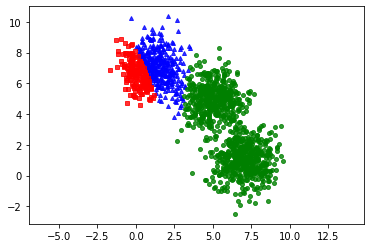

with loop 1
[[1.57004242 7.12650291]
 [6.06538122 2.97546765]
 [0.02104864 6.64448128]]


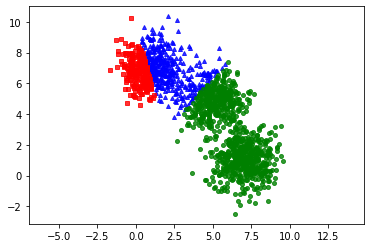

with loop 2
[[2.24678779 6.88730858]
 [6.23762888 2.68649033]
 [0.11072214 6.78987775]]


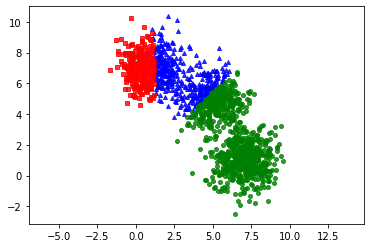

with loop 3
[[2.98727797 6.47972316]
 [6.39524982 2.39356832]
 [0.29669015 6.99862744]]


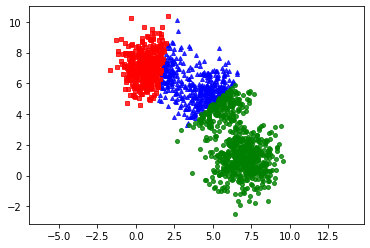

with loop 4
[[3.85037209 5.87148613]
 [6.62319108 1.97563355]
 [0.5738213  7.1173128 ]]


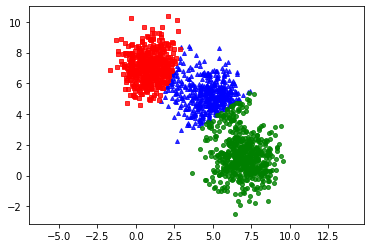

with loop 5
[[4.55956042 5.33146952]
 [6.90799516 1.3717946 ]
 [0.80848496 7.10611035]]


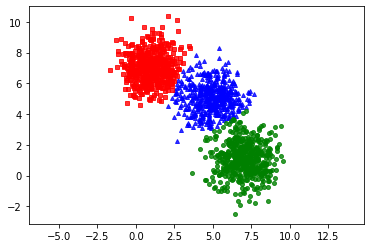

with loop 6
[[4.8785587  5.10120811]
 [6.99966871 1.10377796]
 [0.93920864 7.06009227]]


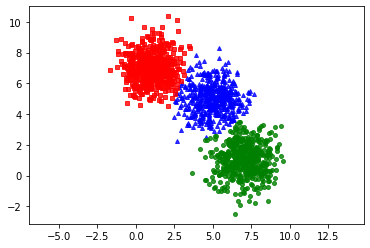

with loop 7
[[4.95053287 5.04635691]
 [7.02332379 1.04925033]
 [0.97389699 7.03446682]]


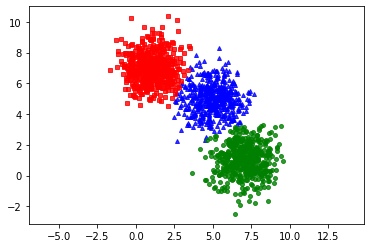

with loop 8
[[4.96770925 5.02607504]
 [7.03032553 1.03249013]
 [0.98228913 7.03155143]]


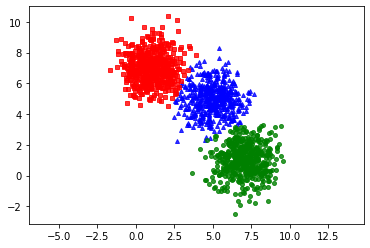

with loop 9
[[4.97427577 5.01444489]
 [7.03476242 1.02972703]
 [0.99135542 7.02984271]]


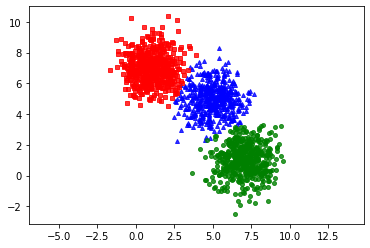

with loop 10
[[4.98309111 5.01177676]
 [7.03476242 1.02972703]
 [0.99853772 7.024455  ]]


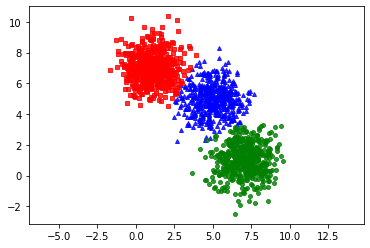

Centers found by our algorithm:
[[4.98605309 5.00756009]
 [7.03476242 1.02972703]
 [1.00354219 7.02457761]]


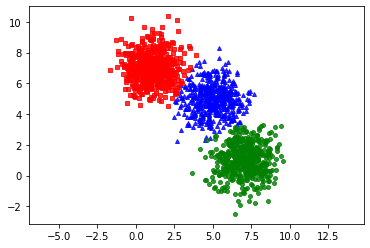

In [29]:
(centers, labels, it) = kmeans(X, K)
print('Centers found by our algorithm:')
print(centers[-1])

kmeans_display(X, labels[-1])

## Dùng sklearn

Centers found by scikit-learn:
[[0.99853772 7.024455  ]
 [7.03476242 1.02972703]
 [4.98309111 5.01177676]]


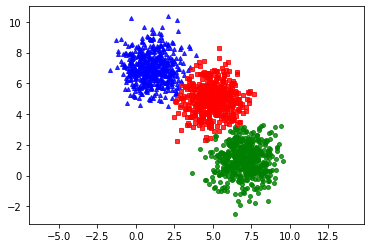

In [19]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
print('Centers found by scikit-learn:')
print(kmeans.cluster_centers_)
pred_label = kmeans.predict(X)
kmeans_display(X, pred_label)

## Application

- Images Classification

- Object Segmentation

- Image compression

- ...

### Thuật toán thứ 2 

B1 : Gán label random cho các điểm dataset

B2 : Cập nhật lại các điểm center

    Tính trung bình các điểm có cùng label, đó chính điểm center mới của label đó

B3 : Gán label các điểm còn lại theo các điểm center đã có.

    Tính khoảng cách (theo metric) với từng điểm center. 

    Lấy khoảng cách nhỏ nhất

B4 : Điều kiện dừng: Toàn bộ label không thay đổi.

B5: Quay lại bước 2

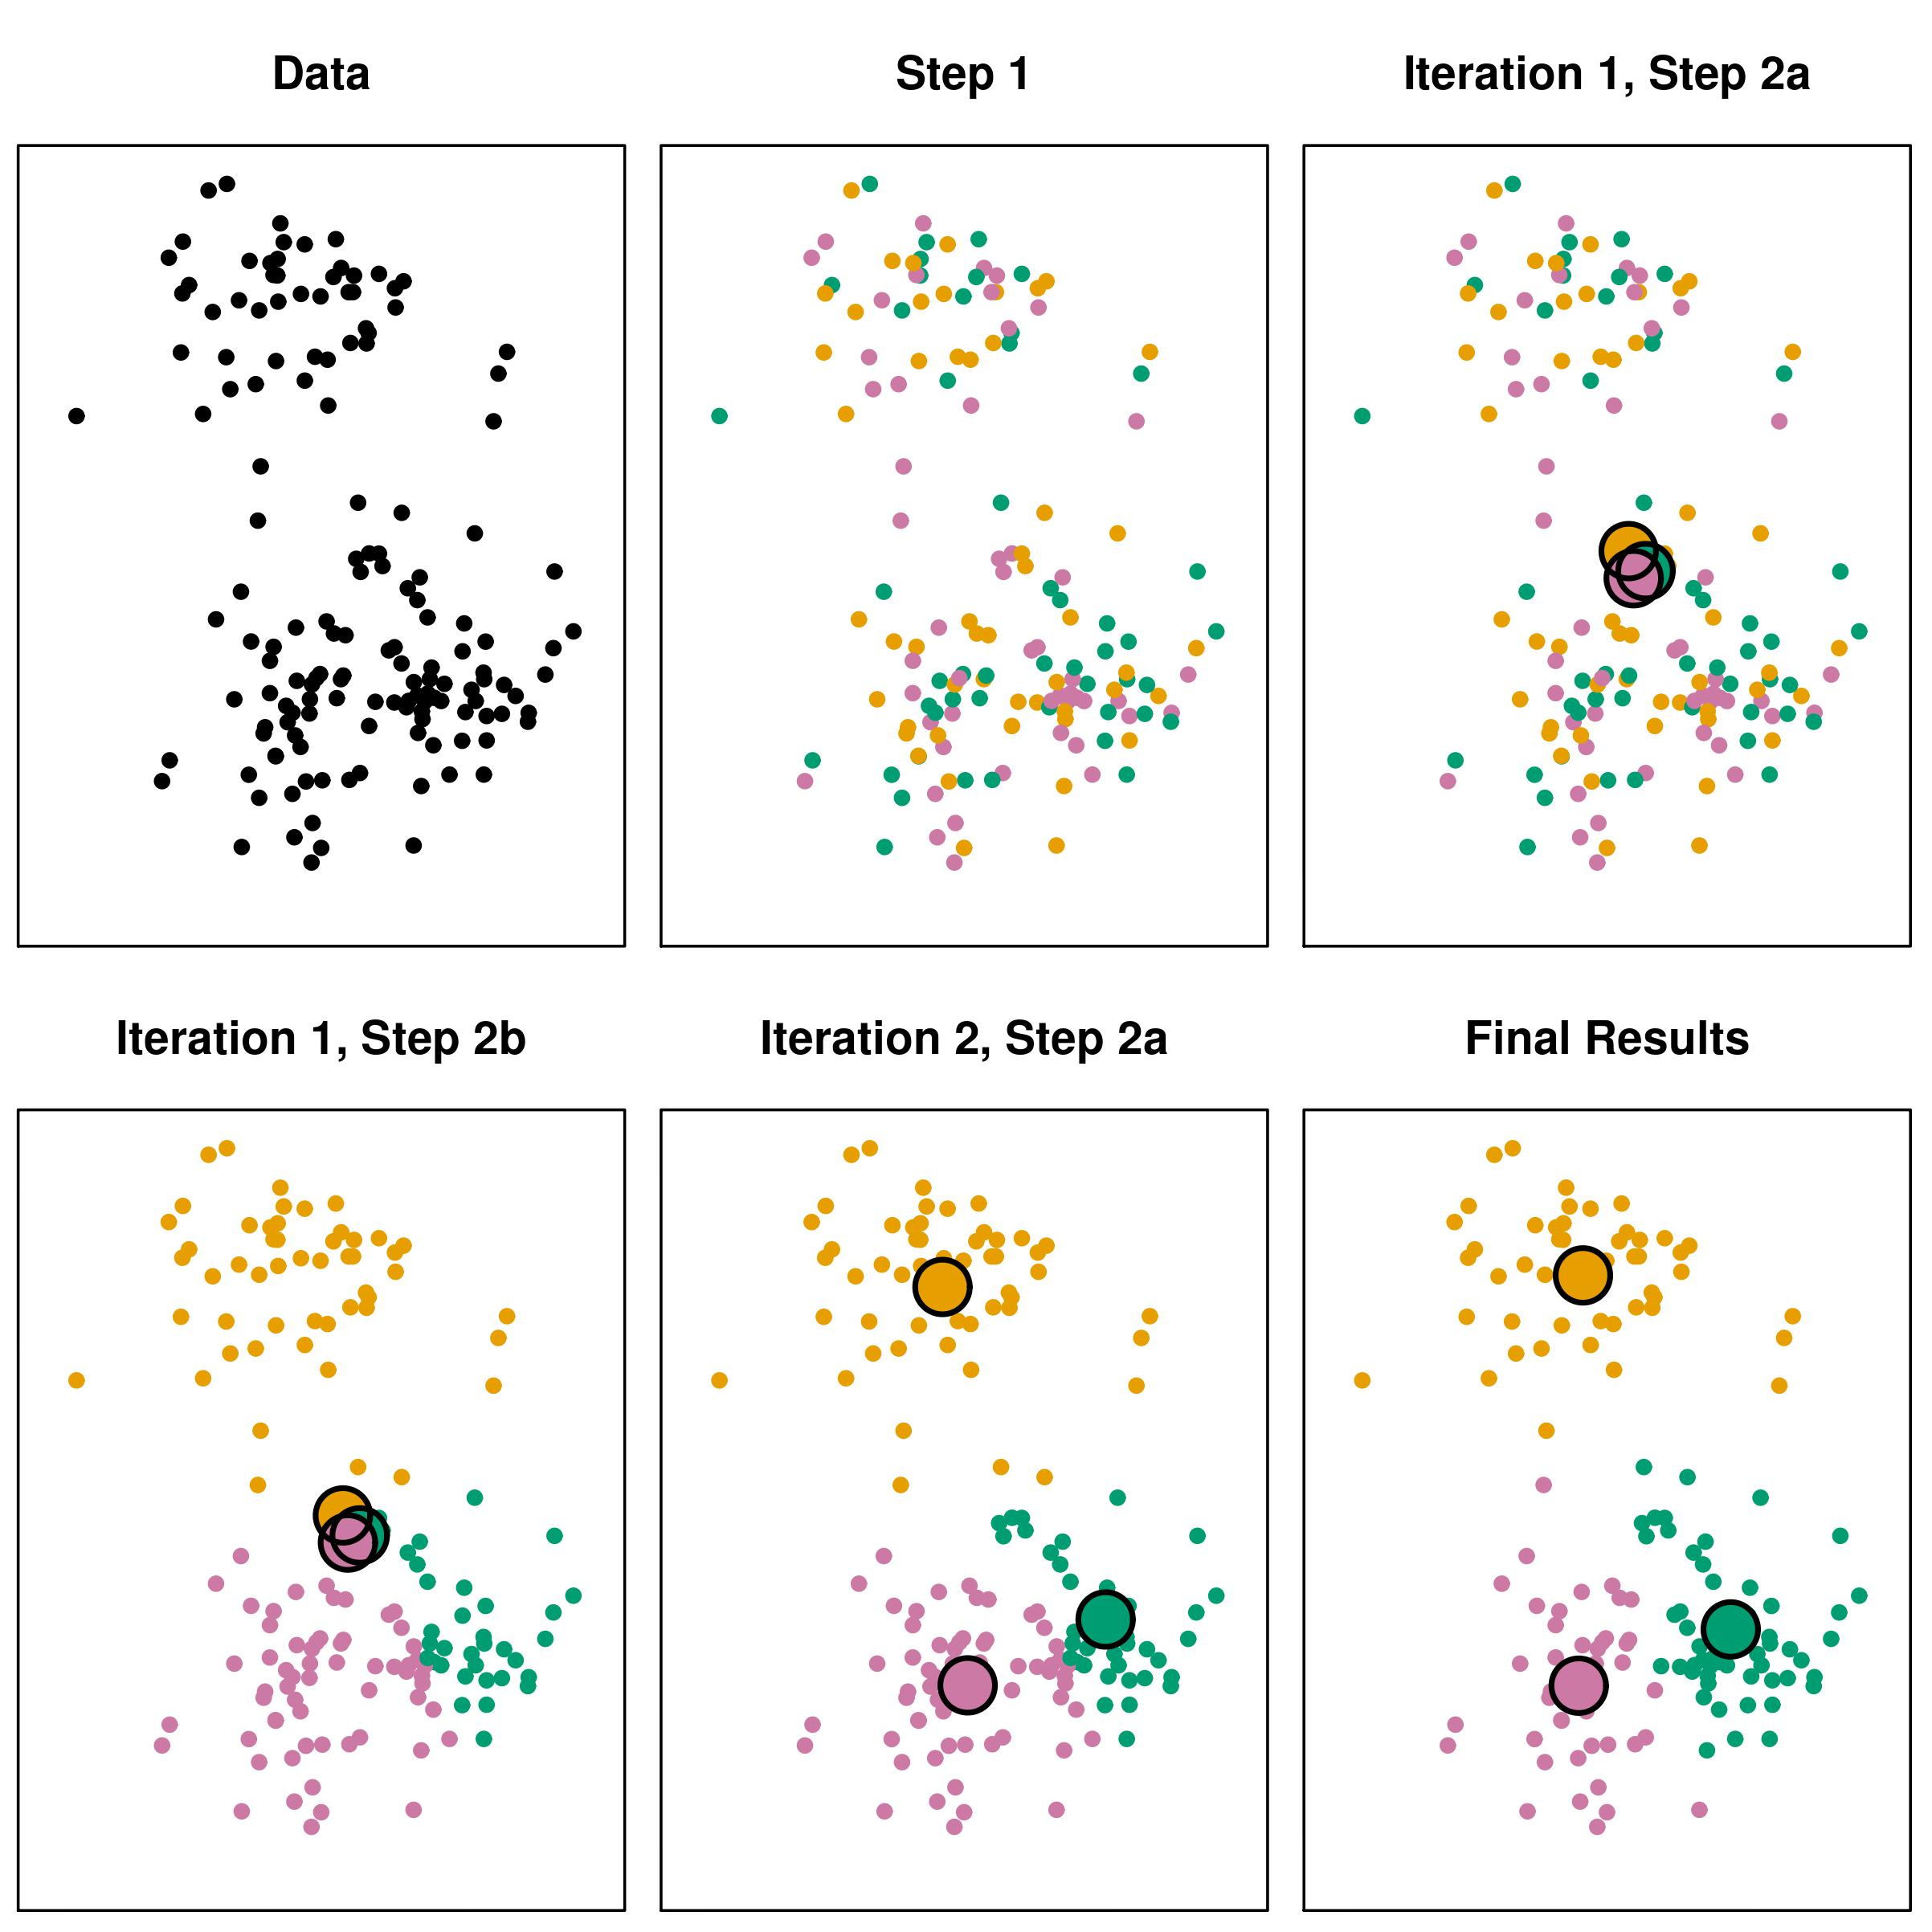

# Bài tập về nhà

1. Code lại thuật toán 2 với dataset trên

2. Tìm hiểu Within-cluster-variation để chọn K (số lượng cluster) cho thích hợp

3. Tìm hiểu Hierarchical clustering cho bài sau
